working on specific part of iris dataset to explore voting Ensemble!

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [93]:
df = pd.read_csv("Iris.csv")
df= df.iloc[:,1:]
df.drop(columns = ['PetalLengthCm' , 'PetalWidthCm'], inplace = True, axis =1)

In [94]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


In [95]:
df

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


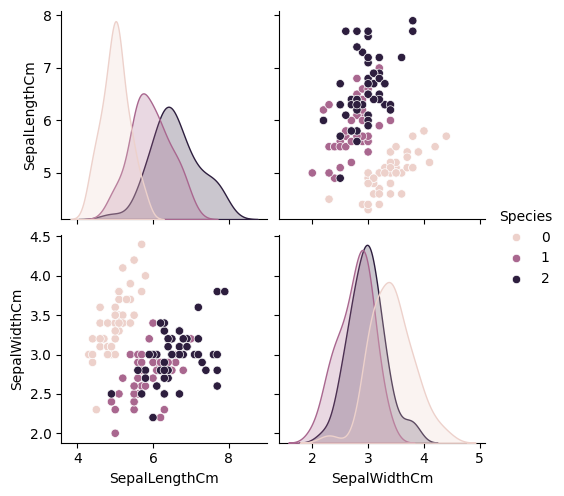

In [96]:
sns.pairplot(df, hue='Species')

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [98]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [99]:
estimators = [ ('lr',clf1), ('rf', clf2) , ('knn',clf3)]
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [100]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [101]:
x

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [102]:
for i in estimators:
  a=cross_val_score(i[1], x,y, cv=10, scoring = 'accuracy')
  print(i[0], np.round(np.mean(a),2))

lr 0.81
rf 0.73
knn 0.76


In [103]:
from sklearn.ensemble import VotingClassifier


#Hardvoting

In [104]:
vc = VotingClassifier(estimators = estimators)
b=cross_val_score(vc, x,y, cv=10, scoring = 'accuracy')
print(np.round(np.mean(b),2))

0.77


# Softvoting

In [105]:
vc = VotingClassifier(estimators = estimators, voting='soft')
c=cross_val_score(vc, x,y, cv=10, scoring = 'accuracy')
print(np.round(np.mean(c),2))

0.77


In [120]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators2 = [('svm1', svm1), ('svm2',svm2), ('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators2:
    d = cross_val_score(estimator[1], x, y, cv=10, scoring='accuracy')
    print(estimator[0],np.round(np.mean(d),2))

svm1 0.82
svm2 0.81
svm3 0.81
svm4 0.8
svm5 0.79


In [118]:
vc2 = VotingClassifier(estimators = estimators2, voting='soft')
e = cross_val_score(vc2, x,y, cv=10, scoring = 'accuracy')
print(np.round(np.mean(e),2))

0.83


In [108]:
print(x.shape)  # Should be (N, features)
print(y.shape)  # Should be (N,)


(150, 2)
(150,)
